In [ ]:
pip install finnhub-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import finnhub
finnhub_client = finnhub.Client(api_key="cfgveo1r01qlga2um3tgcfgveo1r01qlga2um3u0")

#candle ticker,time period,unix time stamp from, to
#Reusult c:close price, h:high price,L: low price, o: open price
print(finnhub_client.stock_candles('AAPL', 'D', 1325307600, 1672462800))


{'c': [14.68677142857143, 14.765699999999999, 14.929628571428571, 15.085700000000001, 15.06177142857143, 15.1157, 15.091060714285714, 15.04962857142857, 14.9932, 15.167839285714285, 15.325339285714287, 15.276771428571427, 15.0107, 15.264589285714285, 15.014628571428572, 15.952128571428572, 15.87962857142857, 15.974271428571429, 16.178910714285713, 16.302839285714285, 16.29247857142857, 16.25427142857143, 16.41712857142857, 16.570339285714287, 16.743910714285715, 17.024271428571428, 17.6132, 17.622128571428572, 17.94997857142857, 18.19497857142857, 17.773910714285716, 17.93605, 17.932839285714287, 18.38747857142857, 18.322839285714284, 18.442478571428573, 18.657478571428573, 18.77712142857143, 19.121771428571428, 19.372839285714285, 19.445339285714287, 19.470689285714286, 19.041410714285714, 18.937839285714286, 18.953200000000002, 19.356771428571427, 19.470339285714285, 19.71427142857143, 20.28927142857143, 21.056410714285715, 20.912839285714284, 20.913189285714285, 21.467839285714287, 

In [ ]:
import pandas as pd
import finnhub
import datetime
finnhub_client = finnhub.Client(api_key="cfgveo1r01qlga2um3tgcfgveo1r01qlga2um3u0")
data = finnhub_client.stock_candles('AAPL', 'D', 1325307600, 1672462800)
df = pd.DataFrame(data)
df = df.drop('s', axis=1)
df = df.rename(columns={'c': 'Close','h':'High','l':'Low','o':"Open",'t':"TimeStamp",'v':'Volume'})
df['Date'] = pd.to_datetime(df['TimeStamp'], unit='s')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Close,High,Low,Open,TimeStamp,Volume
Date,,,,,,
2012-01-03,14.686771,14.732129,14.607129,14.621411,1325548800,302259076
2012-01-04,14.765700,14.809989,14.617129,14.642839,1325635200,260244684
2012-01-05,14.929629,14.948200,14.738200,14.819629,1325721600,271267472
2012-01-06,15.085700,15.098200,14.972129,14.991771,1325808000,318385956
2012-01-09,15.061771,15.276771,15.048200,15.196421,1326067200,394023560
...,...,...,...,...,...,...
2022-12-23,131.860000,132.415000,129.640000,130.920000,1671753600,63814893
2022-12-27,130.030000,131.410000,128.720000,131.380000,1672099200,69007830
2022-12-28,126.040000,131.027500,125.870000,129.670000,1672185600,85438391


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.9 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


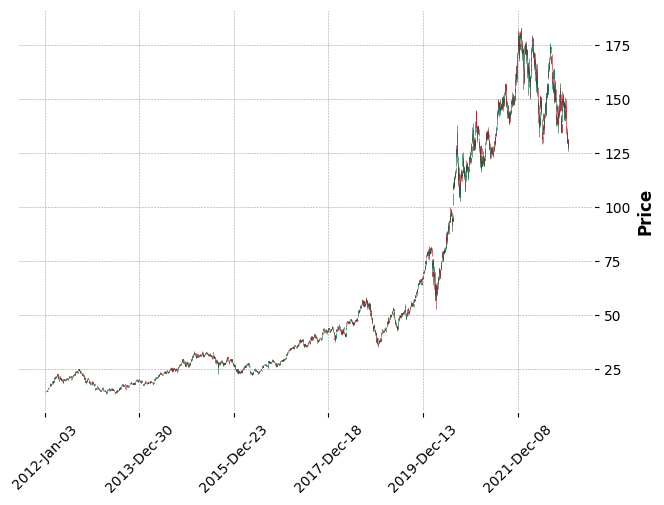

In [ ]:
#Candle Stick
import mplfinance as mpf
mpf.plot(df, type='candle', style='charles')

In [ ]:
import pandas as pd
import numpy as np

def calculate_macd(prices, fast_period, slow_period, signal_period):
    # Convert prices to a pandas DataFrame
    df = pd.DataFrame({'price': prices})

    # Calculate the fast and slow EMA
    df['fast_ema'] = df['price'].ewm(span=fast_period, adjust=False).mean()
    df['slow_ema'] = df['price'].ewm(span=slow_period, adjust=False).mean()

    # Calculate the MACD line
    df['macd'] = df['fast_ema'] - df['slow_ema']

    # Calculate the signal line
    df['signal'] = df['macd'].ewm(span=signal_period, adjust=False).mean()

    return df

def identify_cross_points(df):
    # Create a new column to indicate the direction of the MACD line
    df['macd_direction'] = np.where(df['macd'] > df['signal'], 1, -1)

    # Identify the cross points by looking for changes in the direction of the MACD line
    cross_points = np.where(np.diff(df['macd_direction']) != 0)[0]

    return cross_points

def trade_based_on_macd(df):
    position = 0
    profits_1 = []
    profits_15 =[]
    profits_30 = []
    profits_60 =[]
    WL_1 = []
    WL_15 =[]
    WL_30 = []
    WL_60 =[]
    for i in range(len(df)):
        if i < 1:
            continue
        if df['macd'].iloc[i-1] < df['signal'].iloc[i-1] and df['macd'].iloc[i] > df['signal'].iloc[i]:
            buy_price = df['price'].iloc[i]
            if i+1 < len(df):
                sell_price_1 = df['price'].iloc[i+1]
                pf_1 = sell_price_1 - buy_price
                profits_1.append(pf_1/buy_price)
                if pf_1 > 0:
                    WL_1.append(1)
                elif pf_1 < 0:
                    WL_1.append(0)
            if i+15 < len(df):  
                sell_price_15 = df['price'].iloc[i+15]
                pf_15 = sell_price_15 - buy_price
                profits_15.append(pf_15/buy_price)
                if pf_15 > 0:
                    WL_15.append(1)
                elif pf_15 < 0:
                    WL_15.append(0)
            if i+30 < len(df):  
                sell_price_30 = df['price'].iloc[i+30]
                pf_30 = sell_price_30 - buy_price
                profits_30.append(pf_30/buy_price)
                if pf_30 > 0:
                    WL_30.append(1)
                elif pf_30 < 0:
                    WL_30.append(0)
            if i+60 < len(df):  
                sell_price_60 = df['price'].iloc[i+60]
                pf_60 = sell_price_60 - buy_price
                profits_60.append(pf_60/buy_price)
                if pf_60 > 0:
                    WL_60.append(1)
                elif pf_60 < 0:
                    WL_60.append(0)
    if len(WL_1) > 0:
            print("The one day win loss ratio is " + str(round(sum(WL_1)/len(WL_1),3)) + " The one day profit ratio is " + str(round(sum(profits_1)/len(profits_1),3)))
    else:
            print("The one day win loss ratio is 0 " + " The one day profit ratio is " + str(round(sum(profits_1)/len(profits_1),3)))
    if len(WL_15) > 0:
        print("The fifteen day win loss ratio is " + str(round(sum(WL_15)/len(WL_15),3)) + " The fifteen day profit ratio is " + str(round(sum(profits_15)/len(profits_15),3)))
    else:
        print("The fifteen day win loss ratio is 0 " + " The fifteen day profit ratio is " + str(round(sum(profits_15)/len(profits_15),3)))
    if len(WL_30) > 0:    
        print("The thirty day win loss ratio is " + str(round(sum(WL_30)/len(WL_30),3)) + " The thirty day profit ratio is " + str(round(sum(profits_30)/len(profits_30),3)))
    else:
        print("The thirty day win loss ratio is 0 " + " The thirty day profit ratio is " + str(round(sum(profits_30)/len(profits_30),3)))
    if len(WL_60) > 0: 
        print("The sixty day win loss ratio is " + str(round(sum(WL_60)/len(WL_60),3))+ " The sixty day profit ratio is " + str(round(sum(profits_60)/len(profits_60),3)))
    else:        
        print("The sixty day win loss ratio is 0 " + " The sixty day profit ratio is " + str(round(sum(profits_60)/len(profits_60),3)))
    return



df_5day = calculate_macd(df['Close'], 5, 10, 5)
#df_10day = calculate_macd(df['Close'], 10, 40, 10)
#df_30day = calculate_macd(df['Close'], 30, 60, 30)

#cross_points_5day = identify_cross_points(df_5day)
#cross_points_10day = identify_cross_points(df_10day)
#cross_points_30day = identify_cross_points(df_30day)

#print("5-day cross points:", cross_points_5day)
#print("10-day cross points:", cross_points_10day)
#print("30-day cross points:", cross_points_30day)


profits_5day = trade_based_on_macd(df_5day)

The one day win loss ratio is 0.483 The one day profit ratio is 0.001
The fifteen day win loss ratio is 0.542 The fifteen day profit ratio is 0.008
The thirty day win loss ratio is 0.627 The thirty day profit ratio is 0.023
The sixty day win loss ratio is 0.657 The sixty day profit ratio is 0.051


In [ ]:
import pandas as pd
import datetime as dt

def calculate_sma_ema(data, short_period, long_period):
    data['SMA'] = data['Close'].rolling(window=short_period).mean()
    data['EMA'] = data['Close'].ewm(span=long_period).mean()
    return data

def generate_signals(data):
    data['Signal'] = 0
    data.loc[data['EMA'] > data['SMA'], 'Signal'] = 1
    data.loc[data['EMA'] < data['SMA'], 'Signal'] = -1
    return data

def get_trades(data):
    win_loss = []
    profit =[]
    position = None
    entry_price = None
    
    for i in range(len(data)):
        current_signal = data.iloc[i]['Signal']
        previous_signal = data.iloc[i - 1]['Signal'] if i > 0 else None
        
        if current_signal == 1 and previous_signal != 1:
            position = 'Long'
            entry_price = data.iloc[i]['Close']
        elif current_signal == -1 and previous_signal != -1 and position == 'Long':
            exit_price = data.iloc[i]['Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for EMA and SMA strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for EMA and SMA strategy is " + str(round(sum(profit)/len(profit),3)))
    return 

def sma_ema_strategy(data, short_period, long_period):
    data = calculate_sma_ema(data, short_period, long_period)
    data = generate_signals(data)
    trades = get_trades(data)
    return


trades = sma_ema_strategy(df, 10, 50)


The win loss ratio for EMA and SMA strategy is 0.719 The profit ratio for EMA and SMA strategy is 0.014


In [ ]:
import pandas as pd
import datetime as dt

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

def rsi_momentum_strategy(data, low_rsi=30, high_rsi=70):
    win_loss = []
    profit =[]
    position = None
    entry_price = None
    
    for i in range(len(data)):
        current_rsi = data.iloc[i]['RSI']
        
        if current_rsi > low_rsi and position is None:
            position = 'Long'
            entry_price = data.iloc[i]['Close']
        elif current_rsi < high_rsi and position == 'Long':
            exit_price = data.iloc[i]['Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for rsi strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for rsi strategy is " + str(round(sum(profit)/len(profit),3)))
    return 

data = calculate_rsi(df, 14)
trades = rsi_momentum_strategy(data, 30, 70)
trades


The win loss ratio for rsi strategy is 0.514 The profit ratio for rsi strategy is 0.002


In [ ]:
import pandas as pd

import datetime as dt


def calculate_kdj(data, k_period=14, d_period=3, j_period=3):
    low_min = data['Low'].rolling(window=k_period).min()
    high_max = data['High'].rolling(window=k_period).max()
    rsv = (data['Close'] - low_min) / (high_max - low_min) * 100
    data['%K'] = rsv.rolling(window=d_period).mean()
    data['%D'] = data['%K'].rolling(window=j_period).mean()
    data['%J'] = 3 * data['%K'] - 2 * data['%D']
    return data

def kdj_strategy(data):
    win_loss = []
    profit =[]
    position = None
    entry_price = None
    
    for i in range(len(data)):
        if i == 0:
            continue

        k_current = data.iloc[i]['%K']
        d_current = data.iloc[i]['%D']
        k_previous = data.iloc[i - 1]['%K']
        d_previous = data.iloc[i - 1]['%D']
        
        if k_current > d_current and k_previous <= d_previous and position is None:
            position = 'Long'
            entry_price = data.iloc[i]['Close']
        elif k_current < d_current and k_previous >= d_previous and position == 'Long':
            exit_price = data.iloc[i]['Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for KDJ strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for KDJ strategy is " + str(round(sum(profit)/len(profit),3)))
    return 


data = calculate_kdj(df,14, 3, 3)
trades = kdj_strategy(data)


The win loss ratio for KDJ strategy is 0.426 The profit ratio for KDJ strategy is 0.003


In [ ]:
import pandas as pd
import datetime as dt



def calculate_wr(data, period=14):
    high_max = data['High'].rolling(window=period).max()
    low_min = data['Low'].rolling(window=period).min()
    data['WR'] = -100 * ((high_max - data['Close']) / (high_max - low_min))
    return data

def wr_strategy(data, low_wr=-80, high_wr=-20):
    win_loss = []
    profit =[]
    position = None
    entry_price = None
    
    for i in range(len(data)):
        current_wr = data.iloc[i]['WR']
        
        if current_wr > low_wr and position is None:
            position = 'Long'
            entry_price = data.iloc[i]['Close']
        elif current_wr < high_wr and position == 'Long':
            exit_price = data.iloc[i]['Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for WR strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for WR strategy is " + str(round(sum(profit)/len(profit),3)))
    return 


data = calculate_wr(df, 14)
trades = wr_strategy(df, -80,-20)



In [ ]:
import pandas as pd
import datetime as dt

def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    data['SMA'] = data['Close'].rolling(window=period).mean()
    data['STD'] = data['Close'].rolling(window=period).std()
    data['Lower Band'] = data['SMA'] - num_std_dev * data['STD']
    data['Upper Band'] = data['SMA'] + num_std_dev * data['STD']
    return data

def bollinger_bands_strategy(data):
    win_loss = []
    profit =[]
    position = None
    entry_price = None
    
    for i in range(len(data)):
        current_price = data.iloc[i]['Close']
        lower_band = data.iloc[i]['Lower Band']
        upper_band = data.iloc[i]['Upper Band']
        
        if current_price <= lower_band and position is None:
            position = 'Long'
            entry_price = current_price
        elif current_price >= upper_band and position == 'Long':
            exit_price = current_price
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for BB strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for BB strategy is " + str(round(sum(profit)/len(profit),3)))
    return 


data = calculate_bollinger_bands(df, 20, 2)
trades = bollinger_bands_strategy(data)


In [ ]:
import pandas as pd
import datetime as dt

def calculate_parabolic_sar(data, start_af=0.02, increment=0.02, max_af=0.2):
    data['SAR'] = data['Close']
    trend = 1
    af = start_af
    ep = data.iloc[0]['Low']

    for i in range(1, len(data)):
        data.at[data.index[i], 'SAR'] = data.iloc[i - 1]['SAR'] + af * (ep - data.iloc[i - 1]['SAR'])

        if trend == 1:
            if data.iloc[i]['Low'] < data.iloc[i]['SAR']:
                trend = -1
                af = start_af
                ep = data.iloc[i]['High']
                data.at[data.index[i], 'SAR'] = data.iloc[i]['High']
            else:
                if data.iloc[i]['High'] > ep:
                    ep = data.iloc[i]['High']
                    af = min(af + increment, max_af)
        else:
            if data.iloc[i]['High'] > data.iloc[i]['SAR']:
                trend = 1
                af = start_af
                ep = data.iloc[i]['Low']
                data.at[data.index[i], 'SAR'] = data.iloc[i]['Low']
            else:
                if data.iloc[i]['Low'] < ep:
                    ep = data.iloc[i]['Low']
                    af = min(af + increment, max_af)

    return data

def parabolic_sar_strategy(data):
    win_loss = []
    profit =[]
    position = None
    entry_price = None

    for i in range(1, len(data)):
        current_price = data.iloc[i]['Close']
        previous_sar = data.iloc[i - 1]['SAR']
        current_sar = data.iloc[i]['SAR']

        if current_price > current_sar and position is None:
            position = 'Long'
            entry_price = current_price
        elif current_price < current_sar and position == 'Long':
            exit_price = current_price
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for SAR strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for SAR strategy is " + str(round(sum(profit)/len(profit),3)))
    return 


data = calculate_parabolic_sar(df, 0.02, 0.02, 0.2)
trades = parabolic_sar_strategy(data)


            

In [ ]:
import pandas as pd
import datetime as dt

def calculate_psy(data, period=14):
    data['Daily Change'] = data['Close'].pct_change()
    data['Up Day'] = data['Daily Change'] > 0
    data['PSY'] = data['Up Day'].rolling(window=period).sum() / period * 100
    return data

def psy_strategy(data, lower_threshold=30, upper_threshold=70):
    win_loss = []
    profit =[]
    position = None
    entry_price = None

    for i in range(len(data)):
        psy = data.iloc[i]['PSY']

        if psy > lower_threshold and position is None:
            position = 'Long'
            entry_price = data.iloc[i]['Close']
        elif psy < upper_threshold and position == 'Long':
            exit_price = data.iloc[i]['Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for PSY strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for PSY strategy is " + str(round(sum(profit)/len(profit),3)))
    return 

data = calculate_psy(df, 14)
trades = psy_strategy(data, 30, 70)


In [ ]:
import pandas as pd
import datetime as dt

def calculate_obv(data):
    data['Daily Change'] = data['Adj Close'].pct_change()
    data['Volume Direction'] = data['Daily Change'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    data['OBV'] = (data['Volume'] * data['Volume Direction']).cumsum()
    return data

def obv_strategy(data):
    win_loss = []
    profit =[]
    position = None
    entry_price = None

    for i in range(1, len(data)):
        previous_obv = data.iloc[i - 1]['OBV']
        current_obv = data.iloc[i]['OBV']

        if current_obv > previous_obv and position is None:
            position = 'Long'
            entry_price = data.iloc[i]['Adj Close']
        elif current_obv < previous_obv and position == 'Long':
            exit_price = data.iloc[i]['Adj Close']
            pf = (exit_price -entry_price)/entry_price
            profit.append(pf)
            if pf > 0:
                win_loss.append(1)
            elif pf <= 0:
                win_loss.append(0)
            position = None
            entry_price = None
    print("The win loss ratio for OBV strategy is " + str(round(sum(win_loss)/len(win_loss),3)) + " The profit ratio for OBV strategy is " + str(round(sum(profit)/len(profit),3)))
    return 


data = calculate_obv(df)
trades = obv_strategy(data)



In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def find_similar_pattern(target, candidates):
    """
    Finds an array with a similar pattern to the target array using DTW.
    """
    best_candidate = None
    best_distance = np.inf
    for candidate in candidates:
        distance, _ = fastdtw(target, candidate, dist=euclidean)
        if distance < best_distance:
            best_candidate = candidate
            best_distance = distance
    return best_candidate